# Ensemble Learning with scikit-learn: Homework Assignment (DU)
## Introduction

In this assignment, you will explore ensemble learning techniques using Python and the scikit-learn library. You will work with a real-world dataset fetched from OpenML, apply various ensemble models, and evaluate their performance.

## Objective: 

- Understand and implement different ensemble learning techniques.
- Gain practical experience with the scikit-learn library.
- Analyze and compare the performance of ensemble models.

## Dataset:

You will use the "wine" dataset from OpenML. This dataset is a multi-class classification problem that involves predicting the type of wine based on different attributes.

## Tasks
1. **Fetching the Dataset:**
- Fetch the "wine" dataset from OpenML using the fetch_openml function in scikit-learn.
- Explore the dataset to understand its features and target variable.

2. **Data Preprocessing:**
- Perform any necessary preprocessing steps such as handling missing values (if any) and splitting the dataset into training and testing sets.
- Normalize or standardize the features if required.

3. **Ensemble Model Implementation:**
- Implement at least two of the following ensemble models: Random Forest, Gradient Boosting, AdaBoost.
- Feel free to explore and implement other ensemble techniques as well.

4. **Model Evaluation:**
- Evaluate the models using appropriate metrics such as accuracy, F1 score, and the ROC-AUC score.
- Create visualizations to compare the performance of different models.

5. **Analysis and Discussion):**
- Discuss the results obtained from different models.
- Which model performed the best and why do you think so?

## Homework Solution

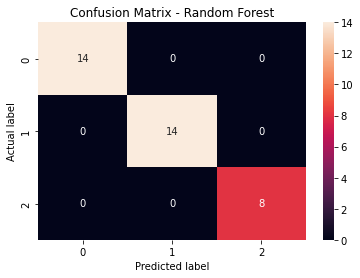

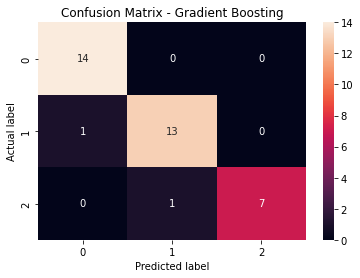

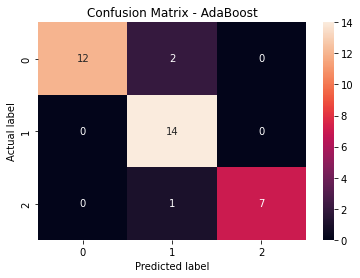

          Random Forest  Gradient Boosting  AdaBoost
Accuracy            1.0           0.944444  0.916667
F1 Score            1.0           0.943997  0.917636
AUC                 1.0           0.990260  0.984916


In [1]:
# Homework Solution: Ensemble Learning with Python and scikit-learn

# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Fetching the dataset
wine_data = fetch_openml(name='wine', version=1, as_frame=True, parser='auto')
X_wine = wine_data.data
y_wine = wine_data.target.astype('int')

# Data preprocessing
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ensemble models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'AdaBoost': AdaBoostClassifier(n_estimators=100, random_state=42)
}

# Training and evaluating models
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled), multi_class='ovr')
    results[name] = [accuracy, f1, auc]
    # Plotting confusion matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='g')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Displaying the results
results_df = pd.DataFrame(results, index=['Accuracy', 'F1 Score', 'AUC'])
print(results_df)
